# **Part 1: Data collection**

In [838]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #for plots
import seaborn as sns #for plots
import datetime as dt

from dateutil.relativedelta import relativedelta #stylized dates
from scipy.optimize import minimize #for function minimization


**Q1**

In [839]:
### Source:https://fred.stlouisfed.org/ and https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?locations=TN
# Import gdpg dataset
gdpg = pd.read_csv("GDPG.csv", error_bad_lines=False)
gdpg.head()


,Data Source,World Development Indicators,Column1,_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,_16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,_29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,_42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,_55,_56,_57,_58,_59,_60,_61,_62
0,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,1966.000000,1967.000000,1968.000000,1969.000000,1970.000,1971.000000,1972.000000,1973.000000,1974.000000,1975.000000,1976.000000,1977.000000,1978.000000,1979.00000,1980.000000,1981.000000,1982.000000,1983.000000,1984.000000,1985.000000,1986.000000,1987.000000,1988.000000,1989.000000,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,1997.000000,1998.000000,1999.000000,2000.000000,2001.000000,2002.000000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000
1,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.078431,18.648649,12.129841,3.961402,7.962872,5.882353,7.307692,8.203903,2.547144,1.185788,7.046874,1.991986,1.238042,7.616588,-2.971257,-3.273646,1.975547,7.911563,1.214349,1.050608,1.800226,-0.090708,-10.519749,-3.685029,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.013078,0.328067,0.180223,3.337903,-0.178726,2.212603,3.936671,4.189368,2.648553,0.050826,-0.095421,-2.343192,-1.089417,2.051914,4.409975,5.570030,3.425412,1.789507,2.603876,3.197143,3.526480,3.992607,2.908004,5.656582,6.361804,6.688755,6.857304,4.572539,0.946811,5.152336,4.014183,1.972652,4.308370,3.982151,2.906749,2.002640,2.537432,2.461969,2.065470,-2.949407
3,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.832278,1.414118,11.229715,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101
4,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.848719,3.770212,7.272501,5.396356,4.049794,-1.787094,-9.546521,1.465741,15.491934,17.909,10.807508,3.145958,4.213394,10.249852,-2.164314,8.578717,4.726198,-2.194216,5.23079,1.995341,-6.932754,-3.350479,-6.534200,0.559360,5.551687,1.414759,1.448387,4.844282,2.272113,6.562921,1.121069,2.693959,-1.160468,-0.299641,1.927028,4.629048,4.234699,3.506516,1.421036,3.734635,5.212695,9.899591,5.518510,8.013486,5.848351,5.374463,5.530987,6.279223,6.274463,6.957010,4.848351,5.142964,6.104241,5.927350,2.745937,0.127595,2.318042,2.952230,3.190336,-0.884981


In [840]:
#Select Tunisia row
gdpg = gdpg.loc[(gdpg['Data Source'] == 'Country Name') | (gdpg['Data Source'] == 'Tunisia')]
gdpg.head()

,Data Source,World Development Indicators,Column1,_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13,_14,_15,_16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,_29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,_42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,_55,_56,_57,_58,_59,_60,_61,_62
0,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.000000,1967.000000,1968.000000,1969.000000,1970.000000,1971.000000,1972.000000,1973.000000,1974.000000,1975.0000,1976.000000,1977.000000,1978.000000,1979.000000,1980.00000,1981.000000,1982.000000,1983.000000,1984.000000,1985.000000,1986.000000,1987.000000,1988.000000,1989.000000,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.00000,1996.000000,1997.000000,1998.000000,1999.000000,2000.000000,2001.000000,2002.000000,2003.0000,2004.000000,2005.000000,2006.0000,2007.000000,2008.000000,2009.00000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000
244,Tunisia,TUN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,3.454868,0.161952,10.409729,4.747815,4.669632,10.560197,17.742718,-0.654644,8.074782,7.1561,7.876853,3.411096,6.440474,6.567521,7.41874,5.514073,-0.493738,4.681917,5.748843,5.648573,-1.446988,6.701371,0.072159,1.746699,7.949819,3.904545,7.805729,2.189829,3.178411,2.35167,7.146081,5.440943,4.783763,6.054635,4.709973,3.796272,1.322557,4.7024,6.235791,3.486546,5.2441,6.709521,4.237782,3.04345,3.511164,-1.664189,3.913276,2.143064,2.706609,1.000181,1.117426,2.244201,2.510907,1.401977,-9.182373


In [841]:
#Remove the 10 first 'nan' colomns
gdpg = gdpg.drop(gdpg.columns[range(0,10)], axis=1) 
gdpg.head()

,_8,_9,_10,_11,_12,_13,_14,_15,_16,_17,_18,_19,_20,_21,_22,_23,_24,_25,_26,_27,_28,_29,_30,_31,_32,_33,_34,_35,_36,_37,_38,_39,_40,_41,_42,_43,_44,_45,_46,_47,_48,_49,_50,_51,_52,_53,_54,_55,_56,_57,_58,_59,_60,_61,_62
0,1966.000000,1967.000000,1968.000000,1969.000000,1970.000000,1971.000000,1972.000000,1973.000000,1974.000000,1975.0000,1976.000000,1977.000000,1978.000000,1979.000000,1980.00000,1981.000000,1982.000000,1983.000000,1984.000000,1985.000000,1986.000000,1987.000000,1988.000000,1989.000000,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.00000,1996.000000,1997.000000,1998.000000,1999.000000,2000.000000,2001.000000,2002.000000,2003.0000,2004.000000,2005.000000,2006.0000,2007.000000,2008.000000,2009.00000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000
244,3.454868,0.161952,10.409729,4.747815,4.669632,10.560197,17.742718,-0.654644,8.074782,7.1561,7.876853,3.411096,6.440474,6.567521,7.41874,5.514073,-0.493738,4.681917,5.748843,5.648573,-1.446988,6.701371,0.072159,1.746699,7.949819,3.904545,7.805729,2.189829,3.178411,2.35167,7.146081,5.440943,4.783763,6.054635,4.709973,3.796272,1.322557,4.7024,6.235791,3.486546,5.2441,6.709521,4.237782,3.04345,3.511164,-1.664189,3.913276,2.143064,2.706609,1.000181,1.117426,2.244201,2.510907,1.401977,-9.182373


In [842]:
# convert rows into columns 
gdpg=gdpg.T
gdpg.head(5)

,0,244
_8,1966.0,3.454868
_9,1967.0,0.161952
_10,1968.0,10.409729
_11,1969.0,4.747815
_12,1970.0,4.669632


In [843]:
# Reindexing
gdpg = gdpg.rename(columns = {0:'Year' , 244 : 'Tunisia_GDPG'}, inplace = False)
gdpg.reset_index(drop=True, inplace=True)
gdpg.head(5)

,Year,Tunisia_GDPG
0,1966.0,3.454868
1,1967.0,0.161952
2,1968.0,10.409729
3,1969.0,4.747815
4,1970.0,4.669632


**Q2**

In [844]:
gdpg.describe()

,Year,Tunisia_GDPG
count,55.00000,55.000000
mean,1993.00000,4.185578
std,16.02082,3.797305
min,1966.00000,-9.182373
25%,1979.50000,2.217015
50%,1993.00000,4.237782
75%,2006.50000,6.338132
max,2020.00000,17.742718


In [845]:
gdpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          55 non-null     float64
 1   Tunisia_GDPG  55 non-null     float64
dtypes: float64(2)
memory usage: 1008.0 bytes


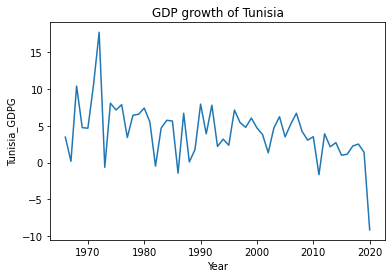

In [846]:
#Polting GDP growth of tunisia
plt.plot(gdpg["Year"] , gdpg["Tunisia_GDPG"])
plt.title("GDP growth of Tunisia")
plt.xlabel("Year")
plt.ylabel("Tunisia_GDPG")
plt.show()

In [847]:
# Import gdp dataset
gdp = pd.read_csv("GDP.csv", error_bad_lines=False)
gdp.head()

,DATE,MKTGDPTNA646NWDB
0,1965-01-01,9.910476e+08
1,1966-01-01,1.040952e+09
2,1967-01-01,1.085714e+09
3,1968-01-01,1.214667e+09
4,1969-01-01,1.289905e+09


In [848]:
#Convert Date to year
gdp['DATE'] = pd.to_datetime(gdp.DATE, format='%Y-%m-%d')
gdp['DATE'] = gdp['DATE'].dt.year
gdp.head()


,DATE,MKTGDPTNA646NWDB
0,1965,9.910476e+08
1,1966,1.040952e+09
2,1967,1.085714e+09
3,1968,1.214667e+09
4,1969,1.289905e+09


In [849]:
# Rename columns
gdp = gdp.rename(columns = { 'DATE' : 'Year','MKTGDPTNA646NWDB' : 'Tunisia_GDP'}, inplace = False)
gdp.head()

,Year,Tunisia_GDP
0,1965,9.910476e+08
1,1966,1.040952e+09
2,1967,1.085714e+09
3,1968,1.214667e+09
4,1969,1.289905e+09


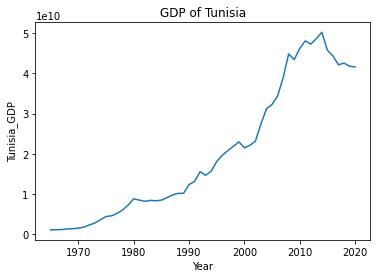

In [850]:
#Polting GDP of tunisia
plt.plot(gdp["Year"] , gdp["Tunisia_GDP"])
plt.title("GDP of Tunisia")
plt.xlabel("Year")
plt.ylabel("Tunisia_GDP")
plt.show()

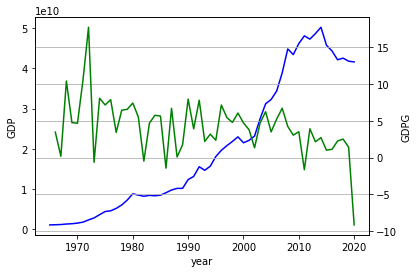

In [851]:
#Plotting both real GDP and GDP growth.
fig,ax=plt.subplots()
ax.plot(gdp["Year"],gdp["Tunisia_GDP"], color="blue")
ax.set_xlabel("year")
ax.set_ylabel("GDP")
ax2=ax.twinx()
ax2.plot(gdpg["Year"], gdpg["Tunisia_GDPG"], color="green")
ax2.set_ylabel("GDPG")
plt.grid(True)
plt.show()

**Q3**
adding some alternative data would be useful to predicting the GDP, because it will help us get more accurate, faster and more granular insights.

In [852]:
# Import Unemployment Rate dataset
u_r = pd.read_csv("Unemployment_Rate.csv", error_bad_lines=False)
u_r.head()


,DATE,SLUEM1524ZSTUN
0,1991-01-01,30.10
1,1992-01-01,30.51
2,1993-01-01,30.94
3,1994-01-01,31.14
4,1995-01-01,31.47


In [853]:
#Convert Date to year
u_r['DATE'] = pd.to_datetime(u_r['DATE'], format='%Y-%m-%d')
u_r['DATE'] = u_r['DATE'].dt.year
u_r.head()


,DATE,SLUEM1524ZSTUN
0,1991,30.10
1,1992,30.51
2,1993,30.94
3,1994,31.14
4,1995,31.47


In [854]:
# Rename columns
u_r = u_r.rename(columns = { 'DATE' : 'Year','SLUEM1524ZSTUN' : 'U_Rate'}, inplace = False)
u_r.head()

,Year,U_Rate
0,1991,30.10
1,1992,30.51
2,1993,30.94
3,1994,31.14
4,1995,31.47


In [855]:
u_r.describe()

,Year,U_Rate
count,29.000000,29.000000
mean,2005.000000,32.296897
std,8.514693,3.425434
min,1991.000000,27.810000
25%,1998.000000,30.460000
50%,2005.000000,31.140000
75%,2012.000000,35.050000
max,2019.000000,42.630000


In [856]:
u_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    29 non-null     int64  
 1   U_Rate  29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes


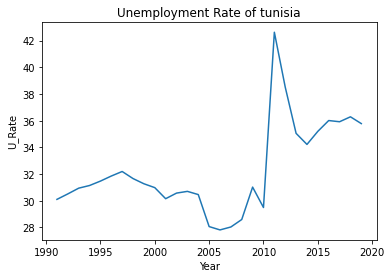

In [857]:
#Polting Unemployment Rate of tunisia of tunisia
plt.plot(u_r["Year"] , u_r["U_Rate"])
plt.title("Unemployment Rate of tunisia")
plt.xlabel("Year")
plt.ylabel("U_Rate")
plt.show()

In [858]:
# Import Consumer_price_index dataset
c_p_i = pd.read_csv("Consumer_price_index.csv", error_bad_lines=False)
c_p_i.head()


,DATE,DDOE01TNA086NWDB
0,1996-01-01,66.5832
1,1997-01-01,69.2046
2,1998-01-01,71.1111
3,1999-01-01,73.1605
4,2000-01-01,74.8287


In [859]:
#Convert Date to year
c_p_i['DATE'] = pd.to_datetime(c_p_i['DATE'], format='%Y-%m-%d')
c_p_i['DATE'] = c_p_i['DATE'].dt.year
c_p_i.head()


,DATE,DDOE01TNA086NWDB
0,1996,66.5832
1,1997,69.2046
2,1998,71.1111
3,1999,73.1605
4,2000,74.8287


In [860]:
# Rename columns
c_p_i = c_p_i.rename(columns = { 'DATE' : 'Year','DDOE01TNA086NWDB' : 'c_p_i'}, inplace = False)
c_p_i.head()

,Year,c_p_i
0,1996,66.5832
1,1997,69.2046
2,1998,71.1111
3,1999,73.1605
4,2000,74.8287


In [861]:
c_p_i.describe()

,Year,c_p_i
count,22.000000,22.000000
mean,2006.500000,94.922541
std,6.493587,21.767079
min,1996.000000,66.583200
25%,2001.250000,77.416875
50%,2006.500000,89.680050
75%,2011.750000,109.410250
max,2017.000000,139.888000


In [862]:
c_p_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    22 non-null     int64  
 1   c_p_i   22 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


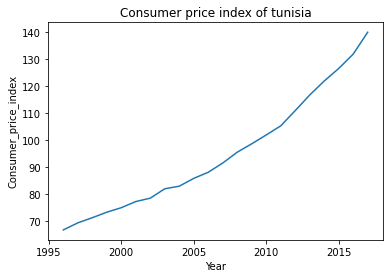

In [863]:
#Polting Consumer_price_index of tunisia
plt.plot(c_p_i["Year"] , c_p_i["c_p_i"])
plt.title("Consumer price index of tunisia")
plt.xlabel("Year")
plt.ylabel("Consumer_price_index")
plt.show()

In [864]:
# Import Index_human_capital_per_person dataset
i_h_c = pd.read_csv("Index_human_capital_per_person.csv", error_bad_lines=False)
i_h_c.head()


,DATE,HCIYISTNA066NRUG
0,1960-01-01,1.089583
1,1961-01-01,1.092287
2,1962-01-01,1.094998
3,1963-01-01,1.097715
4,1964-01-01,1.100440


In [865]:
#Convert Date to year
i_h_c['DATE'] = pd.to_datetime(i_h_c['DATE'], format='%Y-%m-%d')
i_h_c['DATE'] = i_h_c['DATE'].dt.year
i_h_c.head()


,DATE,HCIYISTNA066NRUG
0,1960,1.089583
1,1961,1.092287
2,1962,1.094998
3,1963,1.097715
4,1964,1.100440


In [866]:
# Rename columns
i_h_c = i_h_c.rename(columns = { 'DATE' : 'Year','HCIYISTNA066NRUG' : 'i_h_c'}, inplace = False)
i_h_c.head()

,Year,i_h_c
0,1960,1.089583
1,1961,1.092287
2,1962,1.094998
3,1963,1.097715
4,1964,1.100440


In [867]:
i_h_c.describe()

,Year,i_h_c
count,60.000000,60.000000
mean,1989.500000,1.656240
std,17.464249,0.489684
min,1960.000000,1.089583
25%,1974.750000,1.189568
50%,1989.500000,1.566684
75%,2004.250000,2.013339
max,2019.000000,2.699241


In [868]:
i_h_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    60 non-null     int64  
 1   i_h_c   60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


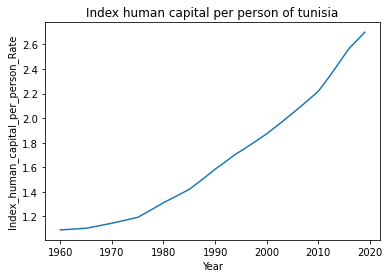

In [869]:
#Ploting Index_human_capital_per_person
plt.plot(i_h_c["Year"] , i_h_c["i_h_c"])
plt.title("Index human capital per person of tunisia")
plt.xlabel("Year")
plt.ylabel("Index_human_capital_per_person_Rate")
plt.show()

In [870]:
#Join dataframes

df = pd.merge(gdp, gdpg,how='inner', on=['Year', 'Year'])
df = pd.merge(df, u_r, how='inner', on=['Year', 'Year'])
df = pd.merge(df, c_p_i, how='outer', on=['Year', 'Year'])
df = pd.merge(df, i_h_c, how='inner', on=['Year', 'Year'])
#Convert index into years 
df=df.set_index('Year')
df

,Tunisia_GDP,Tunisia_GDPG,U_Rate,c_p_i,i_h_c
Year,,,,,
1991,1.307478e+10,3.904545,30.10,NaN,1.613787
1992,1.549729e+10,7.805729,30.51,NaN,1.644422
1993,1.460895e+10,2.189829,30.94,NaN,1.675638
1994,1.563246e+10,3.178411,31.14,NaN,1.707447
1995,1.803088e+10,2.351670,31.47,NaN,1.732247
1996,1.958732e+10,7.146081,31.85,66.5832,1.759361
1997,2.074636e+10,5.440943,32.19,69.2046,1.786898
1998,2.180337e+10,4.783763,31.66,71.1111,1.814867
1999,2.294369e+10,6.054635,31.27,73.1605,1.843274


Few of the variables had nulls values because I could not find data dating. To fill up the missing data, we can use the mean method but we can use k-nearest neighbor algorithm or another method


In [871]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1) 
cpi_fillna = imputer.fit_transform(df[["c_p_i","i_h_c"]])
#Convert a NumPy Array to Pandas Dataframe and join to our df
cpi_fillna = pd.DataFrame(cpi_fillna, columns=['c_p_i', 'i_h_c'])
df.drop(['c_p_i'], axis = 1, inplace = True) 
df_d = df.index
df = pd.merge(cpi_fillna, df,how='outer', on=['i_h_c', 'i_h_c'])
df=df.set_index(df_d)
#Reorder df
df = df[["Tunisia_GDP","Tunisia_GDPG","U_Rate","c_p_i","i_h_c"]]
df

,Tunisia_GDP,Tunisia_GDPG,U_Rate,c_p_i,i_h_c
Year,,,,,
1991,1.307478e+10,3.904545,30.10,66.5832,1.613787
1992,1.549729e+10,7.805729,30.51,66.5832,1.644422
1993,1.460895e+10,2.189829,30.94,66.5832,1.675638
1994,1.563246e+10,3.178411,31.14,66.5832,1.707447
1995,1.803088e+10,2.351670,31.47,66.5832,1.732247
1996,1.958732e+10,7.146081,31.85,66.5832,1.759361
1997,2.074636e+10,5.440943,32.19,69.2046,1.786898
1998,2.180337e+10,4.783763,31.66,71.1111,1.814867
1999,2.294369e+10,6.054635,31.27,73.1605,1.843274


In [872]:
#Replace nan values with average of columns
#df=df.fillna(df["c_p_i"].mode())
#df.isnull().sum()

In [873]:
df

,Tunisia_GDP,Tunisia_GDPG,U_Rate,c_p_i,i_h_c
Year,,,,,
1991,1.307478e+10,3.904545,30.10,66.5832,1.613787
1992,1.549729e+10,7.805729,30.51,66.5832,1.644422
1993,1.460895e+10,2.189829,30.94,66.5832,1.675638
1994,1.563246e+10,3.178411,31.14,66.5832,1.707447
1995,1.803088e+10,2.351670,31.47,66.5832,1.732247
1996,1.958732e+10,7.146081,31.85,66.5832,1.759361
1997,2.074636e+10,5.440943,32.19,69.2046,1.786898
1998,2.180337e+10,4.783763,31.66,71.1111,1.814867
1999,2.294369e+10,6.054635,31.27,73.1605,1.843274


**Visualize the Time Series**

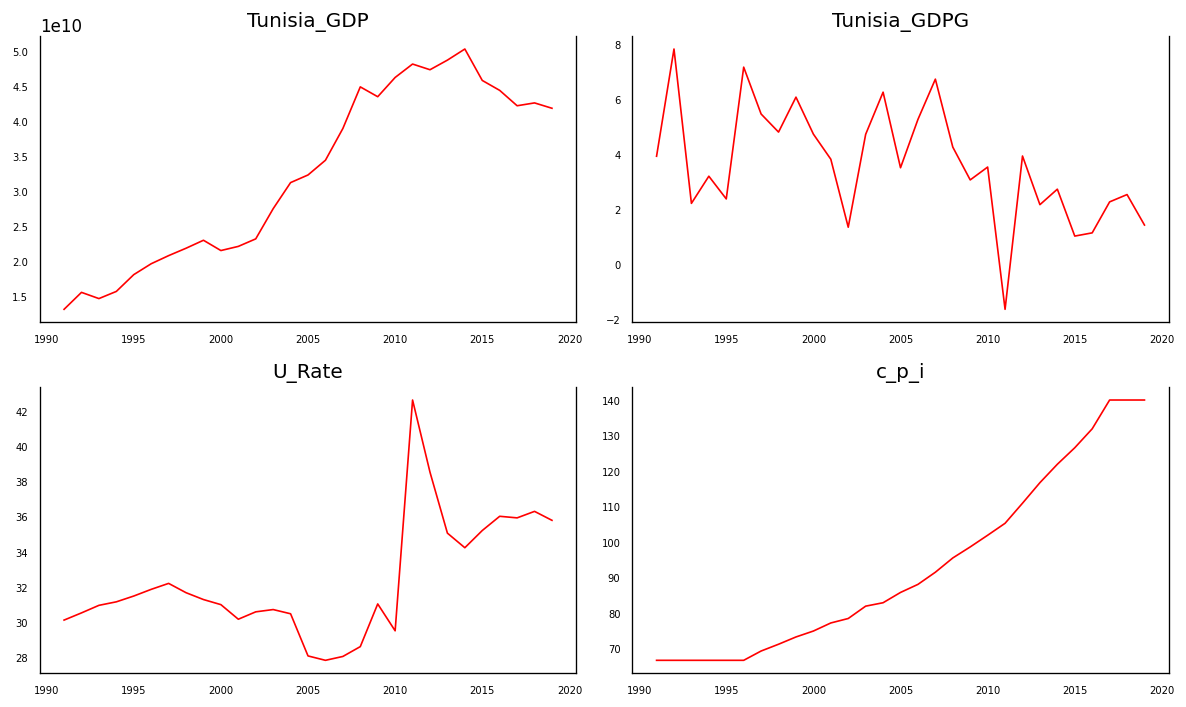

In [874]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [875]:
#correlation analysis 
df.corr()

,Tunisia_GDP,Tunisia_GDPG,U_Rate,c_p_i,i_h_c
Tunisia_GDP,1.000000,-0.448408,0.499037,0.857977,0.893037
Tunisia_GDPG,-0.448408,1.000000,-0.632823,-0.545490,-0.532440
U_Rate,0.499037,-0.632823,1.000000,0.618390,0.592672
c_p_i,0.857977,-0.545490,0.618390,1.000000,0.990366
i_h_c,0.893037,-0.532440,0.592672,0.990366,1.000000


we can see there is some a correlation between the data

# **Part 2: Time Series analysis**

Q1 Our first step in an analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, we have to remove them.

In [876]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


from sklearn.impute import KNNImputer
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns


import datetime
from datetime import datetime


import itertools
import warnings
warnings.filterwarnings('ignore')

**Testing Causation using Granger’s Causality Test**

In [877]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=8
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    
    

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

,Tunisia_GDP_x,Tunisia_GDPG_x,U_Rate_x,c_p_i_x,i_h_c_x
Tunisia_GDP_y,1.0,0.0000,0.0000,0.0,0.0000
Tunisia_GDPG_y,0.0,1.0000,0.0205,0.0,0.0001
U_Rate_y,0.0,0.0001,1.0000,0.0,0.0002
c_p_i_y,0.0,0.0098,0.0000,1.0,0.0000
i_h_c_y,0.0,0.0083,0.0000,0.0,1.0000


The rows are the response variable, columns are predictors. The values in the table are the P-Values. P-Values lesser than the significance level (0.05), implies the Null Hypothesis that the coefficients of the corresponding past values is zero, that is, the X does not cause Y can be rejected.

**Cointegration Test**

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series. 

In [878]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Tunisia_GDP ::  nan       > 60.0627   =>   False
Tunisia_GDPG ::  552.06    > 40.1749   =>   True
U_Rate ::  82.56     > 24.2761   =>   True
c_p_i  ::  15.71     > 12.3212   =>   True
i_h_c  ::  0.01      > 4.1296    =>   False


Perform Johanson's Cointegration Test and Report Summary

**Split the Series into Training and Testing Data**

In [879]:
nobs = 5
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape)

(24, 5)
(5, 5)


**Dicky-fuller Test**

**Check for Stationarity and Make the Time Series Stationary**


use a statistical test, such as the Dickey-Fuller test, to  check if the time series is stationary or non-stationary series.

In [880]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [881]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Tunisia_GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.2238
 No. Lags Chosen       = 0
 Critical value 1%     = -3.753
 Critical value 5%     = -2.998
 Critical value 10%    = -2.639
 => P-Value = 0.9736. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Tunisia_GDPG" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.2044
 No. Lags Chosen       = 0
 Critical value 1%     = -3.753
 Critical value 5%     = -2.998
 Critical value 10%    = -2.639
 => P-Value = 0.0006. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "U_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. No

The ADF test confirms 3 of the time series is stationary. Let’s difference them once and check again.

we are left with one of two choices. That is, either proceed with this series or difference all the series one time.

In [882]:
# 1st difference
df_differenced = df_train.diff(1).dropna()
#df_test = df_test.diff().dropna()

In [883]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Tunisia_GDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.9205
 No. Lags Chosen       = 9
 Critical value 1%     = -4.069
 Critical value 5%     = -3.127
 Critical value 10%    = -2.702
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Tunisia_GDPG" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.3548
 No. Lags Chosen       = 0
 Critical value 1%     = -3.77
 Critical value 5%     = -3.005
 Critical value 10%    = -2.643
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "U_Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance 

Plotting 1st diff

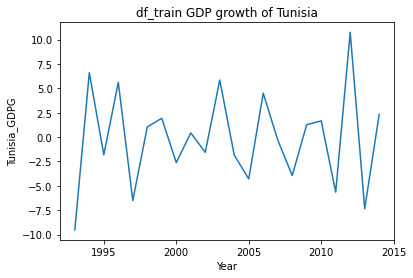

In [884]:
#Polting df_train GDP growth of tunisia
plt.plot(df_differenced.index , df_differenced.Tunisia_GDPG.diff())
plt.title("df_train GDP growth of Tunisia")
plt.xlabel("Year")
plt.ylabel("Tunisia_GDPG")
plt.show()

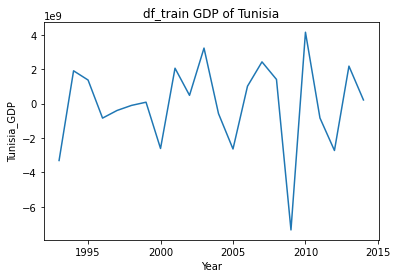

In [885]:
#Polting df_train GDP of tunisia
plt.plot(df_differenced.index , df_differenced.Tunisia_GDP.diff())
plt.title("df_train GDP of Tunisia")
plt.xlabel("Year")
plt.ylabel("Tunisia_GDP")
plt.show()

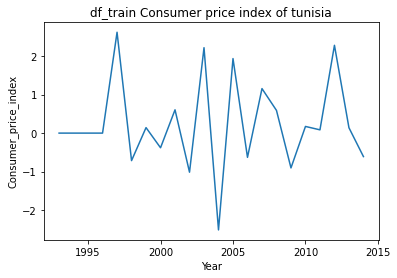

In [886]:
#Polting Consumer_price_index of tunisia
plt.plot(df_differenced.index , df_differenced.c_p_i.diff())
plt.title("df_train Consumer price index of tunisia")
plt.xlabel("Year")
plt.ylabel("Consumer_price_index")
plt.show()

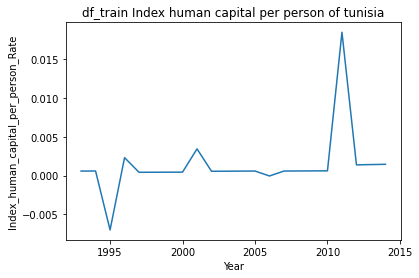

In [887]:
#Ploting Index_human_capital_per_person
plt.plot(df_differenced.index , df_differenced.i_h_c.diff())
plt.title("df_train Index human capital per person of tunisia")
plt.xlabel("Year")
plt.ylabel("Index_human_capital_per_person_Rate")
plt.show()

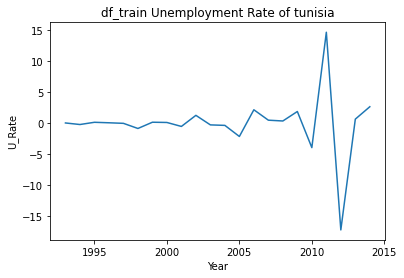

In [888]:
#Polting Unemployment Rate of tunisia of tunisia
plt.plot(df_differenced.index , df_differenced.U_Rate.diff())
plt.title("df_train Unemployment Rate of tunisia")
plt.xlabel("Year")
plt.ylabel("U_Rate")
plt.show()

Our Time series data may be ready.

Ploting oserved ,Trend, Seasonal, Residanl

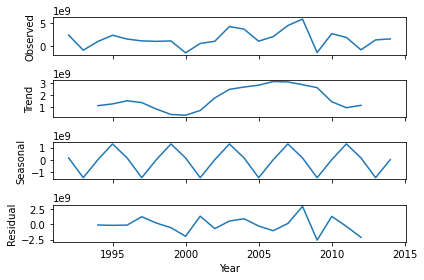

In [889]:
seasonal_decompose(df_differenced.Tunisia_GDP,model='additive', freq=4).plot();

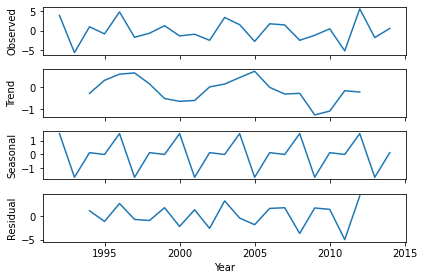

In [890]:
seasonal_decompose(df_differenced.Tunisia_GDPG,model='additive', freq=4).plot();

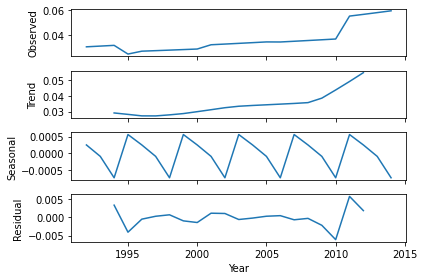

In [891]:
seasonal_decompose(df_differenced.i_h_c,model='additive', freq=4).plot();

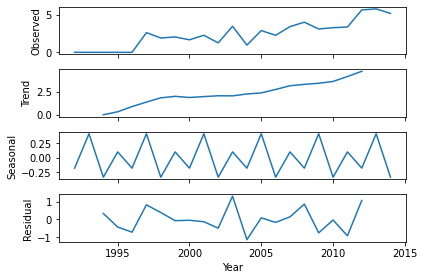

In [892]:
seasonal_decompose(df_differenced.c_p_i,model='additive', freq=4).plot();

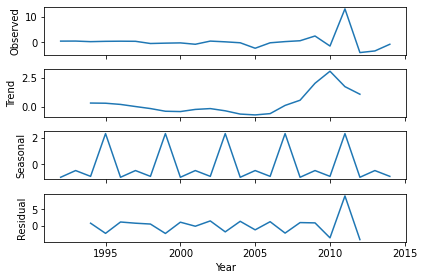

In [893]:
seasonal_decompose(df_differenced.U_Rate,model='additive', freq=4).plot();

**Data preprocessing**

**Q2 Algorithms that we can use for the pre-processing:**


**Differencing** to Transforming non-stationary series to make it stationary,and can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.



**Self Lag Differencing** It can be taken as the difference between the present series and a lagged version of the series. The shift can be of the order 1,2,3,4, etc. For items where we don’t have any lagged version item, take them as NULL.

**Log Self Differencing** It can be taken as the difference between present series and a lagged version of the series. But we can just apply log transformation over the actual series.

**Variance Inflation Factor(VIF)** for Detecting Multicollinearity then we can use **Ridge and Lasso Regression** This is an alternative estimation procedure to ordinary least squares. Penalizes for the duplicate information and shrinks or drops to zero the parameters of a regression model.


**strptime** cast Date column in date datatype and set it as index.



**Shifting and lagging** is used to shift or lag the values in a time series back and forward in time.  shift and tshift methods can be called on datadframe and timeseries both to either shift values or datetimes. 

**Q3**

**Vector Autoregression (VAR)** is a multivariate forecasting algorithm that is used when two or more time series influence each other. 

**Select the Order (P) of VAR model**

we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC. Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

In [894]:
model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  33.40053374665712
BIC :  34.88161315873862
FPE :  340777376146837.6
HQIC:  33.773021067426086 

Lag Order = 2
AIC :  33.383280457910004
BIC :  36.11088659130579
FPE :  515594593579238.25
HQIC:  34.025822445718745 

Lag Order = 3
AIC :  24.636833529588074
BIC :  28.61596662567731
FPE :  545618533318.5392
HQIC:  25.50040727404511 

Lag Order = 4
AIC :  -56.49166566430938
BIC :  -51.264071228150925
FPE :  -9.328429895198286e-22
HQIC:  -55.47118431047742 

Lag Order = 5
AIC :  -95.44247333091873
BIC :  -88.98052242083256
FPE :  -4.440744035990868e-44
HQIC:  -94.34885449535341 

Lag Order = 6
AIC :  -107.76607441193696
BIC :  -100.09898427449777
FPE :  -3.9768215900195695e-52
HQIC:  -106.70888606535254 

Lag Order = 7
AIC :  -103.9904534757916
BIC :  -95.16819453872577
FPE :  -7.384258735354657e-53
HQIC:  -103.11350353938448 

Lag Order = 8
AIC :  -97.70706518334961
BIC :  -87.80827217965242
FPE :  -1.687480970858227e-52
HQIC:  -97.20016576955757 

Lag Order = 9
AIC :  

In the above output, the AIC drops to lowest at lag 6, then increases at lag 7 and then continuously drops further. Let’s go with the lag 6 or 10 model.

In [895]:
x = model.select_order(maxlags=10)
x.summary()

,AIC,BIC,FPE,HQIC
0,43.49,43.72,7.718e+18,43.47
1,32.41,33.78,1.604e+14,32.29
2,-28.55,-26.04,6.224e-12,-28.78
3,-66.84,-63.18,-7.774e-29*,-67.17
4,-109.4*,-104.6*,-3.070e-51,-109.8*
5,-104.6,-98.62,-1.387e-51,-105.1
6,-102.4,-95.29,-1.093e-52,-103.0
7,-99.14,-90.93,-3.612e-53,-99.90
8,-95.17,-85.81,-3.123e-53,-96.04
9,-93.30,-82.80,-3.771e-54,-94.27


According to FPE and HQIC, the optimal lag is observed at a lag order of 4.

Train the VAR Model of Selected Order(p)

Since the explicitly computed AIC is the lowest at lag 6, I choose the selected order as 6.

In [896]:
model_fitted = model.fit(10)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 13, Feb, 2022
Time:                     01:39:00
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -81.4176
Nobs:                     14.0000    HQIC:                  -94.1351
Log likelihood:           807.077    FPE:               -9.73733e-56
AIC:                     -93.0576    Det(Omega_mle):    -4.51350e-59
--------------------------------------------------------------------
Results for equation Tunisia_GDP
                        coefficient        std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                -398565.664870  454052891.142302           -0.001           0.999
L1.Tunisia_GDP             0.638026          0.024074           26.503           0.000
L1.Tunisia_GDPG     26336076.9

Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [897]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)
def adjust(val, length= 6): return str(val).ljust(length)
for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Tunisia_GDP : 1.51
Tunisia_GDPG : 1.84
U_Rate : 0.36
c_p_i  : 0.72
i_h_c  : 0.95


Forecast VAR model using statsmodels

In [898]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order) 

# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
forecast_input

10


array([[ 3.22730076e+10,  3.48654562e+00,  2.80600000e+01,
         8.56987000e+01,  2.03927660e+00],
       [ 3.43773103e+10,  5.24409976e+00,  2.78100000e+01,
         8.79673000e+01,  2.07380843e+00],
       [ 3.89140784e+10,  6.70952102e+00,  2.80300000e+01,
         9.13928000e+01,  2.10892534e+00],
       [ 4.48609691e+10,  4.23778155e+00,  2.85900000e+01,
         9.54082000e+01,  2.14463663e+00],
       [ 4.34549359e+10,  3.04345009e+00,  3.10200000e+01,
         9.85190000e+01,  2.18095279e+00],
       [ 4.62063313e+10,  3.51116407e+00,  2.94900000e+01,
         1.01803000e+02,  2.21788383e+00],
       [ 4.81228381e+10, -1.66418909e+00,  4.26300000e+01,
         1.05172000e+02,  2.27330327e+00],
       [ 4.73111963e+10,  3.91327587e+00,  3.85200000e+01,
         1.10823000e+02,  2.33010721e+00],
       [ 4.86838486e+10,  2.14306442e+00,  3.50500000e+01,
         1.16614000e+02,  2.38833094e+00],
       [ 5.02713421e+10,  2.70660857e+00,  3.42200000e+01,
         1.21795000e+02

In [899]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_results  = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_forecast')
df_results 


,Tunisia_GDP_forecast,Tunisia_GDPG_forecast,U_Rate_forecast,c_p_i_forecast,i_h_c_forecast
Year,,,,,
2015,5.557937e+10,2.416437,36.502943,127.683369,2.579571
2016,5.804748e+10,10.702423,37.016810,133.527734,2.679327
2017,7.028140e+10,11.970486,23.007226,140.092247,2.783734
2018,7.671027e+10,2.892036,34.256803,146.822109,2.925482
2019,8.613064e+10,18.050571,23.966250,154.917174,3.033037


In [900]:
df_test

,Tunisia_GDP,Tunisia_GDPG,U_Rate,c_p_i,i_h_c
Year,,,,,
2015,4.578007e+10,1.000181,35.20,126.447,2.509179
2016,4.436078e+10,1.117426,36.01,131.779,2.567984
2017,4.216397e+10,2.244201,35.92,139.888,2.611012
2018,4.257027e+10,2.510907,36.29,139.888,2.654760
2019,4.180458e+10,1.401977,35.78,139.888,2.699241


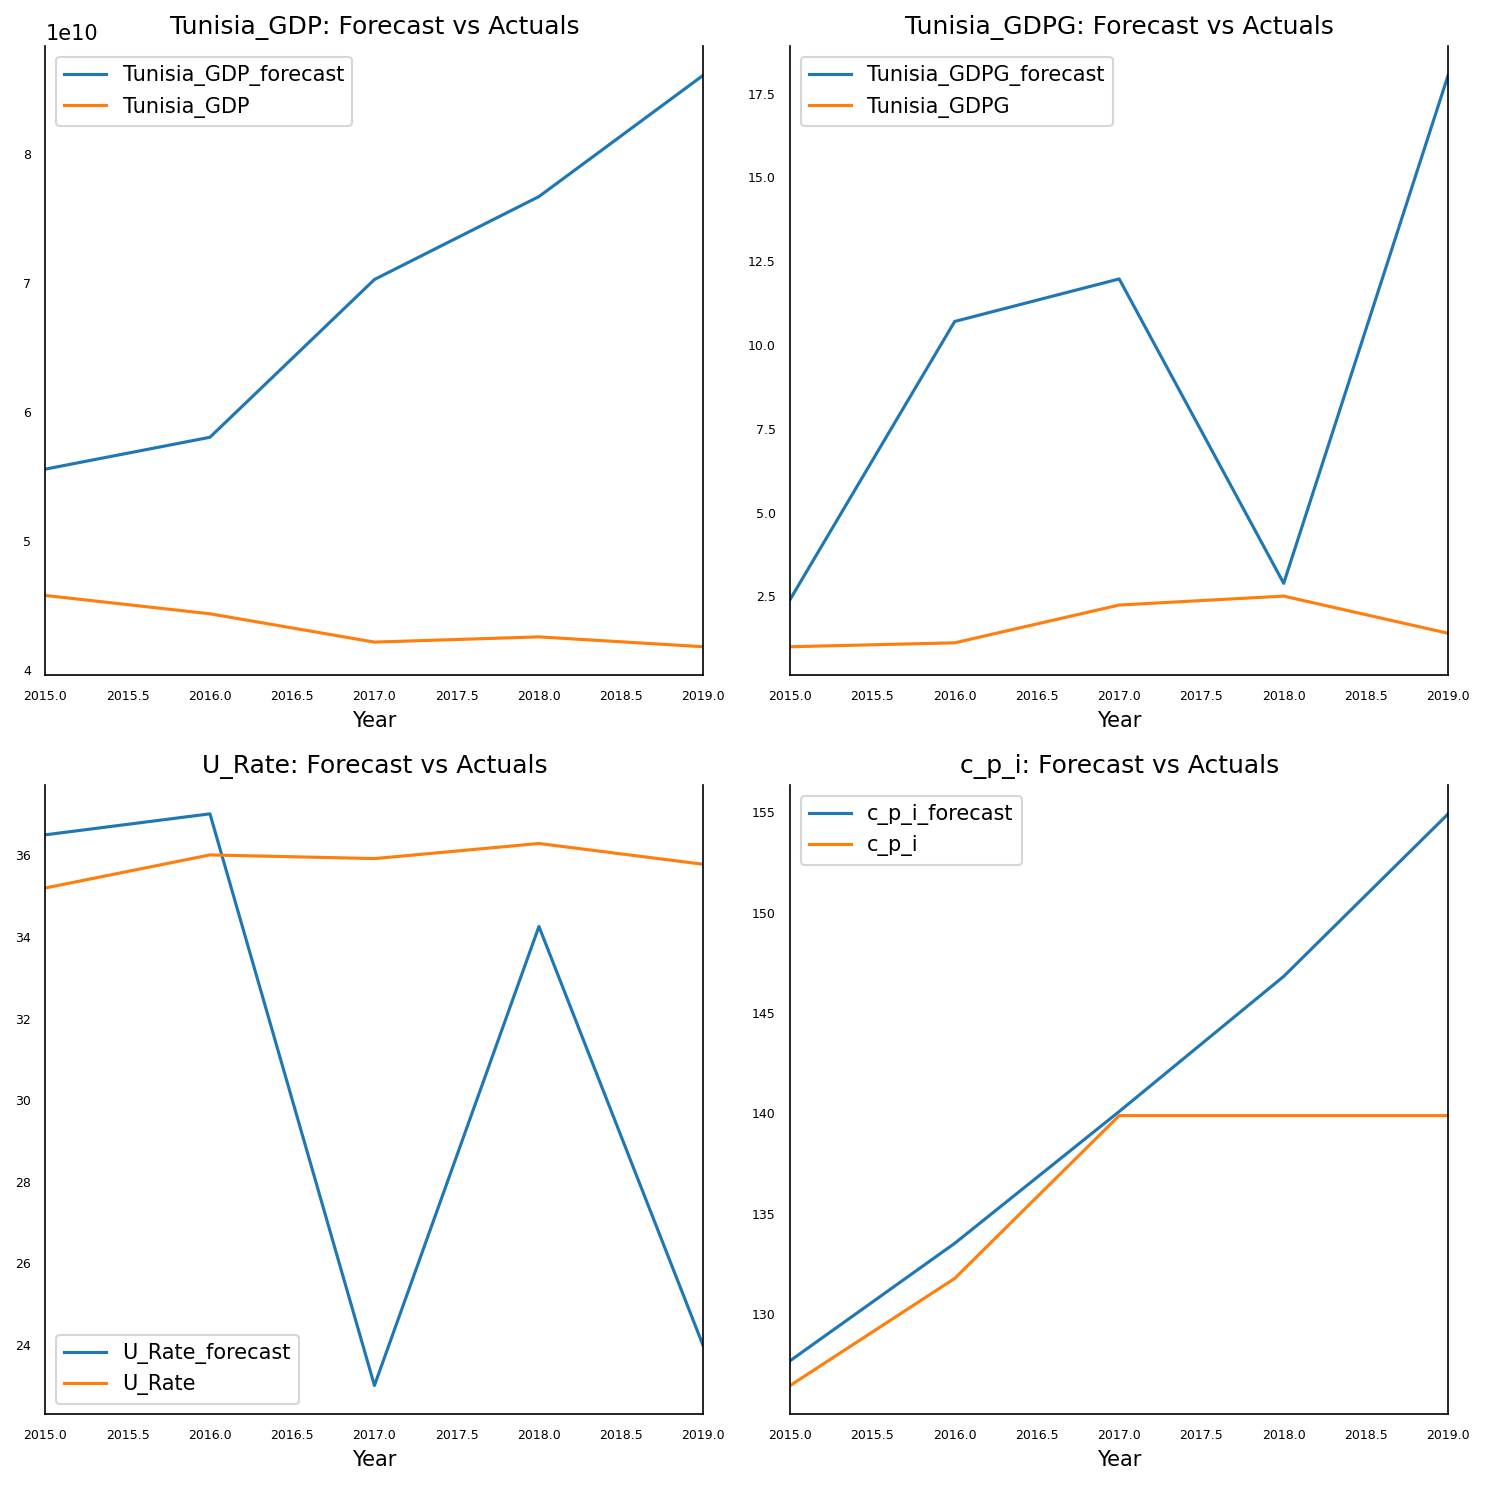

In [901]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Q3

evaluate the forecasts, 
compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.

In [902]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Tunisia_GDP')
accuracy_prod = forecast_accuracy(df_results['Tunisia_GDP_forecast'].values, df_test['Tunisia_GDP'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of:	Tunisia_GDPG')
accuracy_prod = forecast_accuracy(df_results['Tunisia_GDPG_forecast'].values, df_test['Tunisia_GDPG'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of:	U_Rate')
accuracy_prod = forecast_accuracy(df_results['U_Rate_forecast'].values, df_test['U_Rate'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of:	c_p_i')
accuracy_prod = forecast_accuracy(df_results['c_p_i_forecast'].values, df_test['c_p_i'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of:	i_h_c')
accuracy_prod = forecast_accuracy(df_results['i_h_c_forecast'].values, df_test['i_h_c'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))



Forecast Accuracy of: Tunisia_GDP
mape   :  0.6103
me     :  26013898678.69
mae    :  26013898678.69
mpe    :  0.6103
rmse   :  28997519666.7906
corr   :  -0.9023
minmax :  0.3544

Forecast Accuracy of:	Tunisia_GDPG
mape   :  5.2709
me     :  7.5515
mae    :  7.5515
mpe    :  5.2709
rmse   :  9.6519
corr   :  -0.1318
minmax :  0.6697

Forecast Accuracy of:	U_Rate
mape   :  0.1621
me     :  -4.89
mae    :  5.8139
mpe    :  -0.1361
rmse   :  7.9139
corr   :  -0.1123
minmax :  0.1617

Forecast Accuracy of:	c_p_i
mape   :  0.0363
me     :  5.0305
mae    :  5.0305
mpe    :  0.0363
rmse   :  7.4644
corr   :  0.869
minmax :  0.0337

Forecast Accuracy of:	i_h_c
mape   :  0.0726
me     :  0.1918
mae    :  0.1918
mpe    :  0.0726
rmse   :  0.2154
corr   :  0.9934
minmax :  0.0667


In [903]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_test, df_results)



1.6817122936518148e+20

In [904]:
from sklearn.metrics import r2_score
r2_score(df_test.Tunisia_GDPG, df_results.Tunisia_GDPG_forecast)

-249.2240649274634

In [905]:
r2_score(df_test, df_results)

-221.95494408857402

Trying to apply ARIMA on tunisia gdp

In [906]:
# Running ARIMA on Tunisia
#filterin the training data
# Import gdp dataset
gdp = pd.read_csv("GDP.csv", error_bad_lines=False)

# Rename columns
gdp = gdp.rename(columns = { 'DATE' : 'Year','MKTGDPTNA646NWDB' : 'value'}, inplace = False)
gdp.head()

#Convert Date to year
gdp['Year'] = pd.to_datetime(gdp.Year, format='%Y-%m-%d')

gdp=gdp.set_index('Year')

X_train=gdp[gdp.index<'2012-01-01']
X_test=gdp[gdp.index>='2011-01-01']
print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')


X_train shape (47, 1)
X_test shape (10, 1)


In [907]:
index_before2011=pd.date_range(start=X_train.index[0],end=X_train.index[-1],freq='AS')
index_before2011
#defining the period for which we want a prediction for the test-data
df_index_before2011=pd.DataFrame(index_before2011)
df_index_before2011.columns=['ds']
 

In [908]:
index_all_years=pd.date_range(start=gdp.index[0],end=gdp.index[-1],freq='AS')
index_all_years
#define the period for which we want a prediction for the future
df_index_all_years=pd.DataFrame(index_all_years)
df_index_all_years.columns=['ds']


In [909]:
index_7years=pd.date_range(end=X_test.index[-1],freq='AS',periods=7)#freq='AS' to maintain the same frequency
index_7years

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [910]:
X_train.head()

,value
Year,
1965-01-01,9.910476e+08
1966-01-01,1.040952e+09
1967-01-01,1.085714e+09
1968-01-01,1.214667e+09
1969-01-01,1.289905e+09


In [911]:
#Optimazing the model
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))#computes all possible combinations of (p,d,q)


In [912]:
aic_dic={}
for order in pdq:
    try:
        model_arima = ARIMA(X_train,order=order)
        model_arima_fit = model_arima.fit()
        aic_dic[str(order)]=model_arima_fit.aic
        print(order,model_arima_fit.aic)
    except:
        continue
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

(0, 0, 0) 2328.986217306909
(0, 0, 1) 2273.9447077791015
(0, 1, 0) 2074.895979747058
(0, 1, 1) 2074.3881834252934
(0, 1, 2) 2076.027264820465
(0, 1, 3) 2077.99087316373
(0, 1, 4) 2067.9038500738598
(0, 2, 0) 2048.586474374631
(0, 2, 1) 2024.9982048223546
(0, 2, 2) 2026.8091901884789
(1, 0, 0) 2146.294823405563
(1, 1, 0) 2073.9554575520688
(1, 1, 1) 2073.675209461648
(1, 2, 0) 2041.4462938991744
(1, 2, 1) 2026.834097538851
(1, 2, 2) 2028.5510888768715
(1, 2, 4) 2027.3917399733036
(2, 0, 0) 2135.2252018997183
(2, 1, 0) 2075.6743413841
(2, 1, 1) 2075.633267728947
(2, 1, 2) 2077.295212044925
(2, 2, 0) 2038.2123598321878
(2, 2, 1) 2028.6030571273673
(2, 2, 2) 2030.5496999893046
(2, 2, 3) 2030.1128240751382
(3, 0, 0) 2134.7313225579724
(3, 0, 2) 2153.813653586179
(3, 1, 0) 2076.8931079385216
(3, 1, 1) 2077.1233282412
(3, 1, 2) 2076.8141440728837
(3, 2, 0) 2029.4014681143408
(3, 2, 1) 2030.649928544135
(3, 2, 2) 2032.059388109023
(3, 2, 3) 2027.697573076592
(4, 0, 0) 2143.406675765049
(4, 1, 

In [913]:
#we get the combination with the minimum aic score
#min(aic_dic,key=aic_dic.get)

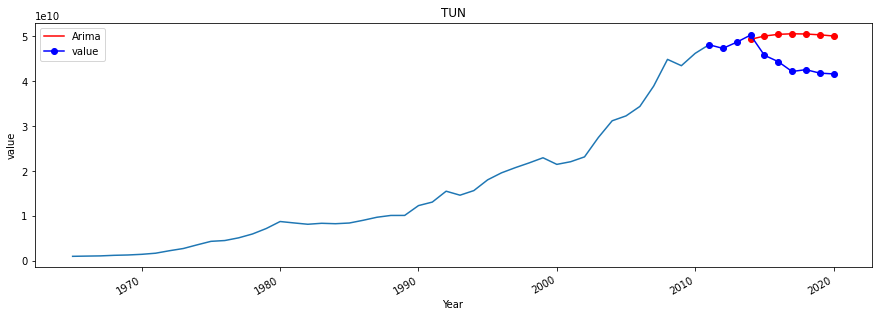

In [914]:
#Regression metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from statsmodels.tsa.arima_model import ARIMA
# Running ARIMA with random numbers
model_arima = ARIMA(X_train, order=(3, 0, 0)) # start 2-0-0 and move to the best
model_arima_fit = model_arima.fit(disp=-1)

# Saving ARIMA predictions
fcast1 = model_arima_fit.forecast(7)[0]

# Passing the same index as the others
fcast1 = pd.Series(fcast1, index=index_7years)
fcast1 = fcast1.rename("Arima") 

# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x=X_train.index, y='value', data =X_train )
chart.set_title('TUN')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
X_test.plot(ax=ax, color='blue', marker="o", legend=True)


**Q4**

Vector Auto Regression (VAR) is one of the most commonly used methods for multivariate time series forecasting because it's able to understand and use the relationship between several variables. This is useful for describing the dynamic behavior of the data and also provides better forecasting results.
But there is other methods we can use for Multivariate Time Series Forecasting for instance LSTM,GRU and 1d CNN

**Q5**

We need more data to understand the trend of GDP and GDP growth or perhaps VAR is not the ideal model for this case.

Multivariate time series models are different from that of Univariate Time Series models in a way that it also takes structural forms that is it includes lags of different time series variable apart from the lags of it's own.

working with a multivariate time series seemed daunting in its scope. It is a complex topic, so i take so much time to understanding the details.

# Part 3: Deep Learning & modeling

**Q1**

In [915]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [916]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df.index.astype("str")+"-1-1", format='%Y-%m-%d %H:%M:%S')
#Variables for training
cols = list(df)[1:]


In [917]:
#New dataframe with only training data - 5 columns
df_for_training = df[cols]


In [918]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


- As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
- here the n_features is 5. We will make timesteps = 14 (past Year data used for training). 

In [919]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []
n_future = 5   # Number of years we want to look into the future based on the past years.
n_past = 14  # Number of past years we want to use to predict the future.

Reformat input data into a shape: (n_samples x timesteps x n_features)

In [920]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (11, 14, 4).
trainY shape == (11, 1).


In [921]:
trainY


array([[-0.28284101],
       [-0.05675391],
       [-2.55845503],
       [ 0.13762192],
       [-0.7180762 ],
       [-0.445666  ],
       [-1.27053189],
       [-1.21385708],
       [-0.66918806],
       [-0.54026566],
       [-1.07630877]])

**Q2**


I used ReLU as an activation function its a popularity in the deep learning domain.
The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

In [922]:

# define the Autoencoder model
# Initializing the Neural Network based on LSTM
model = Sequential()
# Adding 1st LSTM layer
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# Adding 2nd LSTM layer
model.add(LSTM(32, activation='relu', return_sequences=False))
# Adding Dropout
model.add(Dropout(0.2))
# Output layer
model.add(Dense(trainY.shape[1]))

# Compiling the Neural Network
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 14, 64)            17664     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


Plot to look how the training went

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 1.1431 - val_loss: 0.6548
Epoch 2/5
1/1 [==============================] - 0s 41ms/step - loss: 1.1093 - val_loss: 0.6024
Epoch 3/5
1/1 [==============================] - 0s 40ms/step - loss: 1.0501 - val_loss: 0.5450
Epoch 4/5
1/1 [==============================] - 0s 36ms/step - loss: 1.0397 - val_loss: 0.4876
Epoch 5/5
1/1 [==============================] - 0s 37ms/step - loss: 1.0069 - val_loss: 0.4305


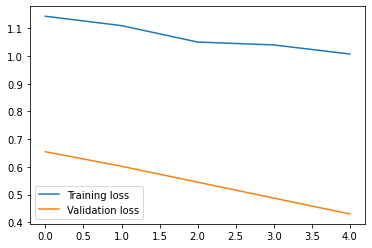

In [923]:
# fit the model
#Plot to look how the training went
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [924]:
#as inputs for prediction. We only have all 5 variables until the last year in our dataset.
n_past = 20
n_years_for_prediction=5  #let us predict past 5 years

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_years_for_prediction).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_years_for_prediction:]) #shape = (n, 1) where n is the n_years_for_prediction


[Timestamp('2000-01-01 00:00:00', freq='D'), Timestamp('2000-01-02 00:00:00', freq='D'), Timestamp('2000-01-03 00:00:00', freq='D'), Timestamp('2000-01-04 00:00:00', freq='D'), Timestamp('2000-01-05 00:00:00', freq='D')]


Perform inverse transformation to rescale back to original range



Since we used 5 variables for transform, the inverse expects same dimensions

Therefore, let us copy our values 5 times and discard them after inverse transform

In [925]:

prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


In [926]:
#Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [927]:
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Tunisia_GDP':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
df_forecast.Tunisia_GDP

0    3.186289
1    3.202722
2    3.191591
3    3.192761
4    3.196395
Name: Tunisia_GDP, dtype: float32

In [928]:
df.iloc[24:].Tunisia_GDP

Year
2015    4.578007e+10
2016    4.436078e+10
2017    4.216397e+10
2018    4.257027e+10
2019    4.180458e+10
Name: Tunisia_GDP, dtype: float64

In [929]:
df.iloc[24:].index

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='Year')

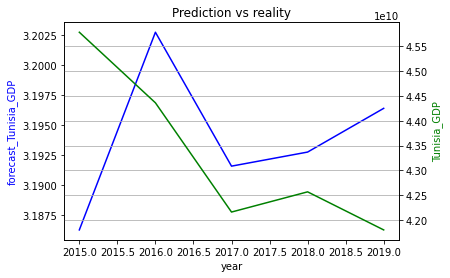

In [935]:
#Plotting Prediction vs reality.
fig,ax=plt.subplots()
ax.plot(df.iloc[24:].index,df_forecast.Tunisia_GDP, color="blue")
ax.set_xlabel("year")
ax.set_ylabel("forecast_Tunisia_GDP",color="blue")

ax2=ax.twinx()
ax2.plot(df.iloc[24:].index, df.iloc[24:].Tunisia_GDP, color="green")
ax2.set_ylabel("Tunisia_GDP", color="green")

plt.grid(True)
plt.title("Prediction vs reality")

plt.show()

In [933]:
from sklearn.metrics import r2_score
r2_score(df.iloc[24:].Tunisia_GDPG, df_forecast.Tunisia_GDP)

-6.364878570641848

**Q4**

In this case, I will choose VAR,

VAR models are quite flexible because they can be made conditional on the potential future paths of specified variables in the model.

are often used in economics  and for multivariate time series. The structure is that each variable is a linear function of past lags of itself and past lags of the other variables.

so VAR has Better forecasting performance.

**It was a great occasion for me to learn something new about data science and increase my knowledge, I hope you like my work and have the opportunity to move forward with you.**

**thank you.**